# 2018-04-25 - Reconnaitre $\theta$ dans des MC statiques
Maintenant qu'on a généré les MC statiques, on va entrainer un réseau convolutionnel à détecter $\theta$ sur trois niveaux de difficultés, qui correspondent à des intervalles croissant de B$\theta$.
On utilise le package [torchvision](http://pytorch.org/docs/master/torchvision/) pour importer nos données, qui sont structurées de la manière suivante :
    
    ./clouds_easy/theta=0/B_theta=1.png
                          B_theta=2.4.png
                          .
                          .
                 /theta=(pi/4)
                 /theta=(pi/2)
                 /theta=(3pi/4)
    ./clouds_medium/theta=0/B_theta=15.png
                    .
                    .
                    .
    ./clouds_hard/theta=0/B_theta=30.png
    
                   

In [22]:
import torch
import torchvision
from torchvision import transforms, datasets

data_transform = transforms.Compose(
    [transforms.Grayscale(),
    transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5,0.5), (0.5,0.5,0.5))])

train_set = datasets.ImageFolder(root='clouds_easy',
                                transform=data_transform)
train_loader = torch.utils.data.DataLoader(train_set,
                                             batch_size=4, shuffle=True,
                                             num_workers=1)

test_set = datasets.ImageFolder(root='clouds_easy',
                                transform=data_transform)
test_loader = torch.utils.data.DataLoader(train_set,
                                             batch_size=4, shuffle=False,
                                             num_workers=1)
#les 4 thetas qu'on essaie d'apprendre
cloud_classes = ('0', 'pi/4', 'pi/2', '3pi/4')

In [179]:
for x in train_loader :
    print(x[0][1])


( 0 ,.,.) = 
  0.3569  0.5216  0.3020  ...  -0.0980 -0.0980  0.0824
  0.4824  0.2863 -0.1451  ...  -0.0588  0.0824  0.3333
  0.2706 -0.1294 -0.4353  ...   0.0902  0.3098  0.4353
           ...             ⋱             ...          
 -0.2392 -0.1529  0.0824  ...   0.6078  0.4824  0.0118
 -0.1451  0.0824  0.3804  ...   0.4902  0.0588 -0.2000
  0.0745  0.3725  0.5529  ...   0.0980 -0.1529 -0.1294
[torch.FloatTensor of size 1x256x256]


( 0 ,.,.) = 
 -0.2314 -0.1059  0.0980  ...  -0.2078 -0.3882 -0.3333
 -0.2706 -0.0902  0.1294  ...  -0.2706 -0.3725 -0.3020
 -0.2941 -0.0667  0.1529  ...  -0.3255 -0.3569 -0.2863
           ...             ⋱             ...          
 -0.1216 -0.0588 -0.0118  ...  -0.0353 -0.3961 -0.4431
 -0.1529 -0.0980  0.0196  ...  -0.0902 -0.4039 -0.4118
 -0.1843 -0.1059  0.0588  ...  -0.1451 -0.4039 -0.3725
[torch.FloatTensor of size 1x256x256]


( 0 ,.,.) = 
  0.0980  0.2863  0.2078  ...  -0.5059 -0.3725 -0.1529
  0.0980  0.2706  0.2000  ...  -0.4980 -0.3725 -0.1529



( 0 ,.,.) = 
  0.3647 -0.1216 -0.4039  ...   0.4980  0.6314  0.4980
  0.3569 -0.1216 -0.3961  ...   0.4980  0.6314  0.4980
  0.3569 -0.1294 -0.3804  ...   0.4980  0.6314  0.5059
           ...             ⋱             ...          
  0.3725 -0.1137 -0.4275  ...   0.4980  0.6471  0.4902
  0.3647 -0.1137 -0.4196  ...   0.4980  0.6392  0.4902
  0.3647 -0.1216 -0.4118  ...   0.4980  0.6392  0.4980
[torch.FloatTensor of size 1x256x256]


( 0 ,.,.) = 
 -0.4039 -0.3647 -0.3255  ...  -0.4667 -0.4510 -0.4353
 -0.2941 -0.2549 -0.2235  ...  -0.4039 -0.3725 -0.3333
 -0.0196 -0.0118 -0.0118  ...  -0.1137 -0.0745 -0.0431
           ...             ⋱             ...          
  0.3255  0.3098  0.2863  ...   0.3098  0.3255  0.3333
 -0.2157 -0.2314 -0.2314  ...  -0.1059 -0.1451 -0.1843
 -0.2941 -0.2784 -0.2706  ...  -0.3176 -0.3176 -0.3020
[torch.FloatTensor of size 1x256x256]


( 0 ,.,.) = 
 -0.5059 -0.3412 -0.2157  ...  -0.2784 -0.4902 -0.5686
 -0.3412 -0.2157 -0.1922  ...  -0.5059 -0.5765 -0.5059



( 0 ,.,.) = 
  0.3961  0.3255 -0.0510  ...   0.1294  0.1608  0.2549
  0.3961  0.3176 -0.0588  ...   0.1373  0.1686  0.2627
  0.3961  0.3098 -0.0667  ...   0.1451  0.1765  0.2627
           ...             ⋱             ...          
  0.3882  0.3490 -0.0353  ...   0.1059  0.1294  0.2392
  0.3882  0.3412 -0.0431  ...   0.1137  0.1373  0.2392
  0.3961  0.3333 -0.0431  ...   0.1216  0.1529  0.2471
[torch.FloatTensor of size 1x256x256]


( 0 ,.,.) = 
  0.1765 -0.0196 -0.1843  ...  -0.1686  0.0667  0.2314
 -0.0353 -0.1922 -0.2392  ...   0.0588  0.2078  0.1529
 -0.2000 -0.2392 -0.2392  ...   0.1765  0.1294 -0.0510
           ...             ⋱             ...          
 -0.1922  0.0902  0.3020  ...  -0.3333 -0.3804 -0.3333
  0.0824  0.2784  0.2157  ...  -0.3804 -0.3255 -0.1843
  0.2549  0.1922 -0.0118  ...  -0.3176 -0.1765  0.0745
[torch.FloatTensor of size 1x256x256]


( 0 ,.,.) = 
  0.2863  0.5059  0.4902  ...  -0.3647 -0.2000 -0.0039
 -0.0118  0.3020  0.5451  ...  -0.4353 -0.3882 -0.2235


On affiche des images du set importé pour vérifier que tout a bien marché :

pi/2          3pi/4          0          pi/4


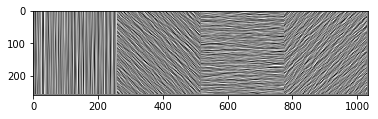

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2)
torch.manual_seed(2)

# pour montrer une image
def imshow(img):
    img = img / 2 + 0.5    #de-normaliser
    npimg = img.numpy()    #convertir en array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# on loop sur un batch
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('          '.join('%s' % cloud_classes[labels[j]] for j in range(4)))

Et maintenant on défini le réseau convolutionné :

In [47]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #1 channels input, 6 outputs, convolution en 5x5
        self.conv1 = nn.Conv2d(1, 6, 20)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 20)
        self.fc1 = nn.Linear(153664, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 153664)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()
print(model)
import time
start_time = time.time()
print("Started training")
for epoch in range(2):  # nbr epochs

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        #on prend les inputs et on les mets dans des Variables()
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        #on remet le gradient à 0 
        optimizer.zero_grad()

        #computation en forward et en backward
        outputs = model(inputs)
        print(outputs.permute(1,0))
        print(labels)
        loss = criterion(outputs.permute(1,0), labels)
        loss.backward()
        optimizer.step()

        #on se tiens au courant de l'avancée du training
        running_loss += loss.data[0]
        if i % 200 == 199:    # On affiche le progrès tout les 200 batchs
            print('[Epoch : %d, mini-batch : %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    
print("Finished training in  %s seconds " % (time.time() - start_time))

Net(
  (conv1): Conv2d(1, 6, kernel_size=(20, 20), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(20, 20), stride=(1, 1))
  (fc1): Linear(in_features=153664, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=4, bias=True)
)
Started training


OSError: [Errno 12] Cannot allocate memory

Et l'optimiseur (on est toujours en descente de gradient stochastique):

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

On entraine :

In [ ]:
import time
start_time = time.time()
print("Started training")
for epoch in range(2):  # nbr epochs

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        #on prend les inputs et on les mets dans des Variables()
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        #on remet le gradient à 0 
        optimizer.zero_grad()

        #computation en forward et en backward
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #on se tiens au courant de l'avancée du training
        running_loss += loss.data[0]
        if i % 200 == 199:    # On affiche le progrès tout les 200 batchs
            print('[Epoch : %d, mini-batch : %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    
print("Finished training in  %s seconds " % (time.time() - start_time))

In [ ]:
m = nn.Linear(20, 30)
input = Variable(torch.randn(128, 20))
output = m(input)
print(output.size())